In [77]:
%load_ext watermark
%watermark -p pandas,networkx,numpy,matplotlib -v -n

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Fri Sep 02 2016 

CPython 3.5.2
IPython 5.1.0

pandas 0.18.1
networkx 1.11
numpy 1.11.1
matplotlib 1.5.2


# Creating Graphs

- Create graph object
- Add nodes and edges
- Add attributes

- Loading in several data types

In [226]:
import csv

import networkx as nx # for using graphs
import pandas as pd # for loading in and exploring data
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline

In [93]:
# Create empty graph
G = nx.Graph()

In [94]:
# Add nodes
G.add_node(1)
G.add_nodes_from([1, 2])
G.add_node(3)

In [95]:
G.nodes()

[1, 2, 3]

⚠️  
**Note**: In `networkx 2.0`, several methods now return iterators

For more details see: https://networkx.github.io/documentation/development/reference/migration_guide_from_1.x_to_2.0.html

In [96]:
G.add_edge(1, 2)

In [97]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 3
Number of edges: 1
Average degree:   0.6667


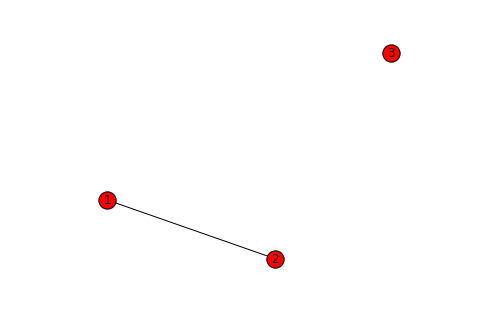

In [98]:
nx.draw(G, with_labels=True)

## Adding and Inspecting Attributes

In [99]:
# add at creation
# nodes
G.add_node(4, favorite_color='blue') # kwargs style
G.add_nodes_from([(5, {'favorite_color' : 'red'}), (6, {'favorite_color' :'purple'})]) # (node, attrdict) tuples

# edges
G.add_edge(5, 6, {'relationship' : 'best friends'})

In [100]:
# accessing all attributes
G.node[4]

{'favorite_color': 'blue'}

In [101]:
print("New Nodes Attributes:  4: %s  5: %s  6: %s" % (G.node[4], G.node[5], G.node[6]))
print()
print("Edge Between 5-6 attributes:", G.edge[5][6])

New Nodes Attributes:  4: {'favorite_color': 'blue'}  5: {'favorite_color': 'red'}  6: {'favorite_color': 'purple'}

Edge Between 5-6 attributes: {'relationship': 'best friends'}


In [106]:
favorite_foods = {
    1 : 'pizza',
    2 : 'mac and cheese',
    3 : 'balogna sandwich',
    4 : 'pizza',
    5 : 'chocolate',
    6 : 'pizza'
}

In [107]:
nx.set_node_attributes(G, 'favorite_food', favorite_foods)

In [109]:
print("Node 4's favorite food is %s" % G.node[4]['favorite_food'])

Node 4's favorite food is pizza


## Reading in Different Representations of Graphs
### Grey's Anatomy Dataset
The dataset we'll look at is a record of all "romantic" encounters between characters on the TV show Grey's Anatomy.

### Edge Lists

Description of dataset

An edge list is a common way of representing a graph. This representation can be thought of as a list of tuples, where each tuple represents an edge between two of the nodes in your graph. The nodes of the graph can be inferred by taking the set of objects from all tuples.

You should infer/determine whether a graph is directed or weighted from an edge list.
- __Weighted__: If edges appear more than once, or if an additional weight attribute is added as a 3rd column, the graph is weighted
- __Directed__: If the "From" and "To" (often seen as "Source" and "Target") of an edge in the list is not arbitrary, it's a directed graph

In [217]:
# what does it look like? 
!head ../data/ga_edgelist.csv

"from","to"
"lexi","sloan"
"lexi","karev"
"owen","yang"
"owen","altman"
"sloan","torres"
"sloan","altman"
"torres","arizona"
"torres","karev"
"derek","grey"


In [262]:
path  = "../data/"
edge_data  = "ga_edgelist.csv"

**Comments:**
Reading in straight from the text file requires a bit of processing for us to handle, since networkx's methods don't handle header rows ("from" and "to") or quoted items. We can probably most simply handle this by opening the text file and creating a list.

In [272]:
edges = []
with open(path + edge_data, 'r') as f:
    filereader = csv.reader(f, delimiter=",", quotechar='"')
    next(filereader) # skips header row
    for row in filereader:
            edges.append(row)

In [273]:
edges[0:5]

[['lexi', 'sloan'],
 ['lexi', 'karev'],
 ['owen', 'yang'],
 ['owen', 'altman'],
 ['sloan', 'torres']]

In [274]:
GA = nx.from_edgelist(edges)

In [275]:
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


#### Mediating Data Processing through `pandas`
Often times the data we'll want to use will probably be analyzed with `pandas`. Reading in our data to a `DataFrame` first saves us a bit of time writng code to open the files due to `read_csv` having sensible defaults around quoted characters and header rows.

In [276]:
ga_edges = pd.read_csv(path + data)

ga_edges.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


In [277]:
GA = nx.from_pandas_dataframe(ga, source="from", target="to")

In [278]:
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


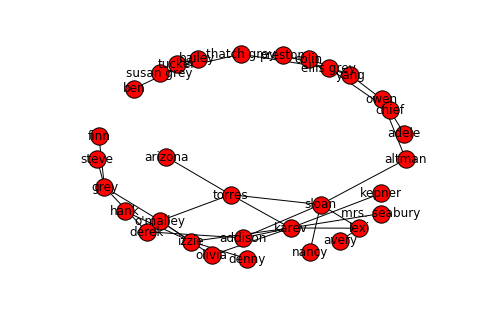

In [279]:
nx.draw_spring(GA, with_labels=True)

### Adjacency Matrices
A common way of representing graph data is through an `adjacency matrix` -- often referred to mathematically as `A`. This data structure is a square, `n x n` matrix where `n = number of nodes`. Each column and row is a node in the matrix. For any two nodes, `i` and `j` the value at `Aij` (row `i` and column `j`) represents the weight of the edge between nodes `i` and `j`.

You can determine what type of graph you're dealing with from the adjacency matrix.

- __Unweighted__: All values are binary - either 1 or 0
- __Undirected__: The matrix is symmetric (`Aij = Aji`)

In [281]:
!head -n 5 ../data/ga_adj.csv

,denny,kepner,grey,colin,finn,thatch grey,derek,nancy,tucker,hank,olivia,steve,ellis grey,o'malley,adele,lexi,altman,avery,mrs. seabury,arizona,owen,chief,karev,ben,preston,yang,sloan,torres,addison,bailey,susan grey,izzie
denny,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
kepner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
grey,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
colin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [297]:
ga_adj = pd.read_csv(path + 'ga_adj.csv', index_col=0)

In [298]:
ga_adj.ix[0:10, 0:10]

,denny,kepner,grey,colin,finn,thatch grey,derek,nancy,tucker,hank
denny,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
kepner,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
grey,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
colin,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
finn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thatch grey,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
derek,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
nancy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
tucker,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hank,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [299]:
GAAdj = nx.from_numpy_matrix(ga_adj.values)

In [300]:
# Numpy matrices don't have labels, so our node labels are the column/row indices from the adjacency matrix
print(GAAdj.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [301]:
label_mapping = dict(zip(GAAdj.nodes(), ga_adj.columns))

GAAdj = nx.relabel_nodes(GAAdj, label_mapping)

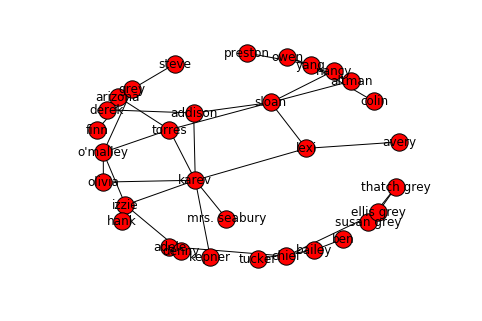

In [302]:
nx.draw_spring(GAAdj, with_labels=True)

Are the two graphs the same? 

In [323]:
# Easiest, least robust way:
print("Same Graph Info?\n---")
print("Edge List Graph\n", nx.info(GA))
print("")
print("Adj. Matrix Graph\n", nx.info(GAAdj))

# slightly better, intuitive way
for node in GA.nodes():
    # assert the node exists in the new graph
    assert node in GAAdj.nodes()
    
    # assert the edges for that node are the same between graphs
    assert sorted(GA[node].keys()) == sorted(GAAdj[node].keys())
    
# Fancy math way that checks additional conditions
print("\n===\n")
print("Isomorphic?", nx.is_isomorphic(GA, GAAdj))

Same Graph Info?
---
Edge List Graph
 Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250

Adj. Matrix Graph
 Name: ()
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250

===

Isomorphic? True


**Gotchas**

In [324]:
print("'denny' From Edge List Graph:", GA['denny'])
print("'denny' From Adjacency Matrix Graph:", GAAdj['denny'])
print("⚠️ Observation: Edge weights are inferred from adjacency matrix")
print()
print("First Edge (sorted) from Edge List Graph:", sorted(nx.to_edgelist(GA))[0])
print("First Edge (sorted) from Adjacency Matrix Graph:", sorted(nx.to_edgelist(GAAdj))[0])
print("⚠️ Observation: Source and Target are ambiguously defined in undirected graphs")

'denny' From Edge List Graph: {'izzie': {}}
'denny' From Adjacency Matrix Graph: {'izzie': {'weight': 1.0}}
⚠️ Observation: Edge weights are inferred from adjacency matrix

First Edge (sorted) from Edge List Graph: ('adele', 'chief', {})
First Edge (sorted) from Adjacency Matrix Graph: ('altman', 'owen', {'weight': 1.0})
⚠️ Observation: Source and Target are ambiguously defined in undirected graphs


### Optional: Adjacency Lists

In [306]:
# Adjacency List
adjacency_list = list(nx.to_dict_of_lists(GA).items())
adjacency_list[0:5]

[('hank', ['izzie']),
 ('kepner', ['karev']),
 ('grey', ["o'malley", 'finn', 'steve', 'derek']),
 ('altman', ['sloan', 'owen']),
 ('derek', ['addison', 'grey'])]

### Optional: Converting Incidence Matrices to Adjacency Matrices
https://github.com/kjhealy/revere